In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

In [76]:
# Study data files
file_path = "cleansheet1.csv"

# Read the data 
flightdata = pd.read_csv(file_path)
#flightdata.head()

In [77]:
# country related info 
flight_cntry = flightdata[["Month", "Country to/from" , "Year"]]
flight_cntry.head()

,Month,Country to/from,Year
0,Jan009,Argentina,2009
1,Jan009,New Zealand,2009
2,Jan009,New Caledonia,2009
3,Jan009,Canada,2009
4,Jan009,China,2009


In [78]:
# Counts flight operation with respect to country
cntrycount = flightdata["Country to/from"].value_counts()
cntrycount

New Zealand             1398
Singapore               1363
USA                     1298
China                   1286
Indonesia                866
Thailand                 708
Papua New Guinea         578
Japan                    573
Hong Kong (SAR)          551
Solomon Islands          454
Malaysia                 450
Fiji                     429
United Arab Emirates     421
Korea                    419
Philippines              393
Taiwan                   377
UK                       339
Vanuatu                  328
South Africa             283
New Caledonia            278
Vietnam                  258
Chile                    239
Western Samoa            165
Canada                   161
Nauru                    160
Brunei                   143
Mauritius                138
Qatar                    137
Tonga                    135
India                    128
Cook Islands             115
Argentina                105
Guam                      90
Germany                   55
Macau         

In [79]:
# Counts flight operation in year 
yearcount = flightdata["Year"].value_counts()
yearcount

2018    1352
2019    1343
2011    1333
2017    1306
2010    1292
2012    1288
2016    1279
2013    1272
2014    1229
2015    1228
2009    1092
2020    1043
Name: Year, dtype: int64

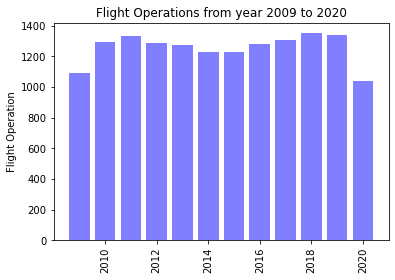

In [80]:
#Flight Operation from year 2009 to 2020"
plt.xticks(rotation='vertical')
plt.bar(yearcount.index, yearcount, color='b', alpha=0.5, align="center")
plt.title("Flight Operations from year 2009 to 2020")
plt.ylabel("Flight Operation")
plt.savefig('Country_Flight_Operation_2009_2020')

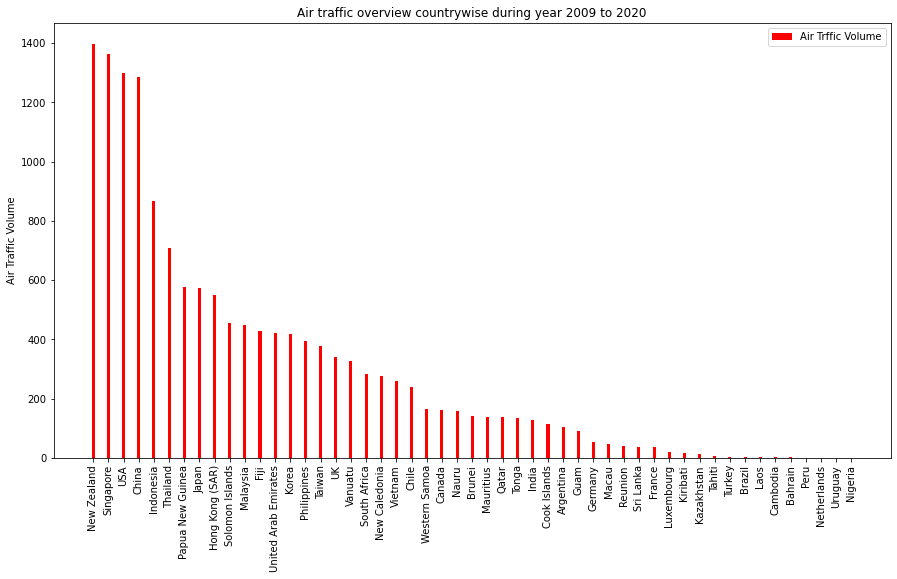

In [81]:
# Plot the Air traffic overview countrywise during year 2009 to 2020

# Country lables on X axis
country_labels =  cntrycount.index

# the label locations
x = np.arange(len(country_labels))
width = 0.2  

# Plot graph
fig, ax = plt.subplots(figsize=(15,8))

yearcntbar = ax.bar(x, cntrycount, width, label='Air Trffic Volume', color = "red")

ax.set_ylabel('Air Traffic Volume')
ax.set_title('Air traffic overview countrywise during year 2009 to 2020')
ax.set_xticks(x)
plt.xticks(rotation='vertical')
ax.set_xticklabels(country_labels)
ax.legend()
plt.savefig('Countrywise_Air_Traffic_2009_2020')

In [82]:
# Top 15 countries during during year 2009 to 2020
topcntry = cntrycount.nlargest(15, 'all')
topcntry

New Zealand             1398
Singapore               1363
USA                     1298
China                   1286
Indonesia                866
Thailand                 708
Papua New Guinea         578
Japan                    573
Hong Kong (SAR)          551
Solomon Islands          454
Malaysia                 450
Fiji                     429
United Arab Emirates     421
Korea                    419
Philippines              393
Name: Country to/from, dtype: int64

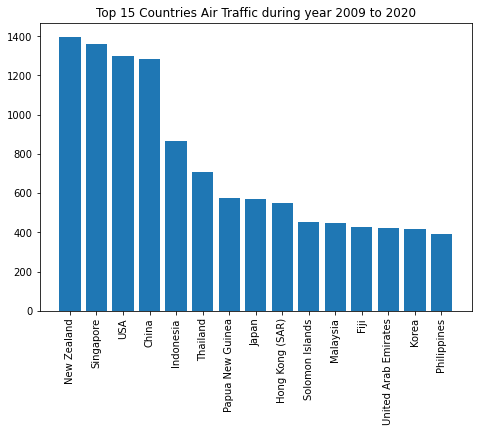

In [83]:
# Plot top 15 countries during during year 2009 to 2020
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xaxis = topcntry.index
yaxis = topcntry
ax.bar(xaxis,yaxis)
plt.title("Top 15 Countries Air Traffic during year 2009 to 2020")
plt.xticks(rotation='vertical')
plt.savefig('Country_Top15_AirTraffic_2009_2020')
plt.show()

In [84]:
# Plot bottom 15 countries during during year 2009 to 2020
bottomcntry = cntrycount.nsmallest(15, 'all')
bottomcntry

Peru            1
Netherlands     1
Uruguay         1
Nigeria         1
Laos            2
Cambodia        2
Bahrain         2
Turkey          3
Brazil          3
Tahiti          7
Kazakhstan     13
Kiribati       16
Luxembourg     20
France         37
Sri Lanka      38
Name: Country to/from, dtype: int64

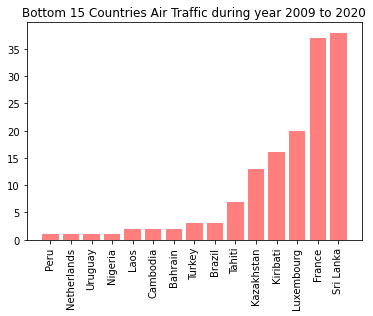

In [85]:
# Plot bottom 15 countries during during year 2009 to 2020
plt.xticks(rotation='vertical')
plt.bar(bottomcntry.index, bottomcntry, color='r', alpha=0.5, align="center")
plt.title("Bottom 15 Countries Air Traffic during year 2009 to 2020")
plt.savefig('Country_Bottom15_AirTraffic_2009_2020')

In [86]:
#Plot the change in air traffic countrywise between year 2019 and 2020
Y19 = flightdata.loc[flightdata['Year'] == 2019]
Y20 = flightdata.loc[flightdata['Year'] == 2020]
CC19 = Y19["Country to/from"].value_counts()
CC20 = Y20["Country to/from"].value_counts()
Y2Y = pd.DataFrame({'Y19': CC19,'Y20': CC20})
Y2Y = Y2Y.replace(np.nan, 0)
YYY = Y2Y.sort_values(by=['Y20'], ascending=False)

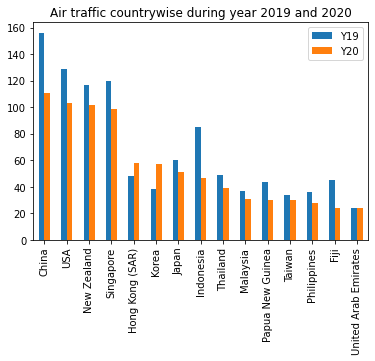

In [87]:
YYbar = YYY.nlargest(15, 'Y20')
YYbar.plot.bar()
plt.title("Air traffic countrywise during year 2019 and 2020")
plt.savefig('Country_AirTraffic_Change_btw_2019_2020')